# Clustering

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
Clustering_data = pd.read_csv('Combined_data.csv')
Clustering_data.rename(columns={'Labor Force':'Labor_Force','Unemployment Rate':'Unemployment_Rate'},inplace = True)

### N_crimes, Unemployment_Rate, YearMonth, and Boroughs as features.

#### One-Hot Encoding
One way to handle categorical variables is to use one-hot encoding. One-hot encoding transforms categorical variables into a set of binary features, where each feature represents a distinct category.

In [83]:
# Define a column transformer that will standardize the numerical columns
# and apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['N_crimes', 'Unemployment_Rate']),
        ('cat', OneHotEncoder(sparse=False), ['YearMonth', 'BORO_NM'])
    ])
features_to_cluster = ['YearMonth', 'N_crimes', 'Unemployment_Rate','BORO_NM']
# Apply the transformations to the dataset
X = preprocessor.fit_transform(data[features_to_cluster])


### Choice of k

#### Silhouette_score

In [84]:
range_n_clusters = range(2,11)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters)
    cluster_labels = km.fit_predict(X)
    
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.2979040232572902
For n_clusters =3, the average silhouette_score is :0.30232053296299255
For n_clusters =4, the average silhouette_score is :0.21492095652760346
For n_clusters =5, the average silhouette_score is :0.240283790077605
For n_clusters =6, the average silhouette_score is :0.2631540802972884
For n_clusters =7, the average silhouette_score is :0.2576314140153002
For n_clusters =8, the average silhouette_score is :0.22558763835759454
For n_clusters =9, the average silhouette_score is :0.2152482639497378
For n_clusters =10, the average silhouette_score is :0.2034188515082284


In [85]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

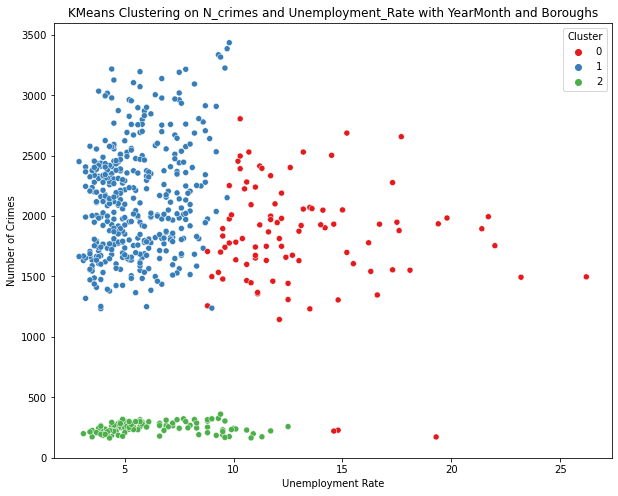

In [86]:
# Add the cluster assignments to the original DataFrame
data['Cluster'] = kmeans_clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Unemployment_Rate', y='N_crimes', hue='Cluster', palette='Set1')
plt.title('KMeans Clustering on N_crimes and Unemployment_Rate with YearMonth and Boroughs')
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Crimes')
plt.legend(title='Cluster')
plt.show()

KMeans Clustering Interpretation:

- Clear Segregation: 
The clusters are well-separated with respect to the number of crimes. This suggests that the number of crimes is a strong feature that influences the formation of clusters.

- Unemployment Rate: 
The distribution of clusters across the unemployment rate is less distinct, which may suggest that while unemployment is considered, it does not have as strong an influence on the cluster formation as the number of crimes.

- Cluster Sizes: 
There appear to be variations in cluster sizes, with some clusters having more data points than others. This could reflect the variability in crime rates and unemployment rates across different times and boroughs.

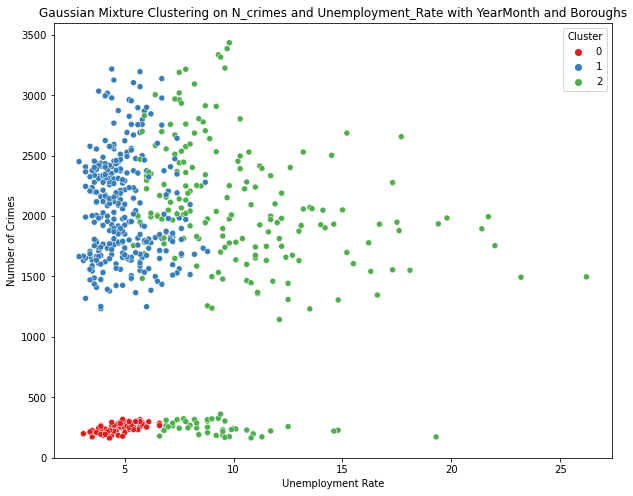

In [87]:
# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_clusters = gmm.fit_predict(X)

# Add the cluster assignments to the original DataFrame
data['Cluster'] = gmm_clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Unemployment_Rate', y='N_crimes', hue='Cluster', palette='Set1')
plt.title('Gaussian Mixture Clustering on N_crimes and Unemployment_Rate with YearMonth and Boroughs')
plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Crimes')
plt.legend(title='Cluster')
plt.show()


Gaussian Mixture Model Clustering Interpretation:

- Overlap: 
Unlike the KMeans clustering, the clusters in the Gaussian Mixture Model have a higher degree of overlap, particularly in the mid-range of the number of crimes and unemployment rates. This indicates a probabilistic nature of cluster assignments.

- Distribution: 
Similar to the KMeans results, a strong gradient based on the number of crimes is observed, but with less clear separation, especially for mid to high crime rates.


Clustering Interpretation：

Crime Rate as a Distinguishing Feature: 
In both models, the number of crimes is a distinguishing feature that significantly influences the cluster assignment.

Time and Boroughs: 
While the plots do not explicitly show the effect of YearMonth and boroughs due to dimensionality reduction for visualization purposes, the existence of multiple clusters suggests that there is variation across different times and boroughs.

Temporal Patterns: 
If YearMonth significantly affected the clustering, it could imply that crime rates and unemployment rates have temporal patterns that contribute to the formation of clusters.

Spatial Patterns: 
Similarly, the inclusion of boroughs in the feature set implies that spatial patterns (i.e., where the boroughs are located within the city) also contribute to cluster formation